In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

In [ ]:
# Converting usable pandas dataframe to csv file to upload onto postgresql

with open('basicandadvanced_player_df.pickle', 'rb') as handle:
    basicandadvanced_player_info = pickle.load(handle)

In [ ]:
names = ['Team_Number', 'Season', 'Position', 'Height', 'Weight', 'Birth_Year', 
                                     'Experience', 'Age', 'games_played', 'games_started', 'min_played/G', 
                                     'min_played_total', 'fg_made/G', 'fg_att/G', 'fg%', '3PM/G', '3PA/G', '3P%', 
                                     '2PM/G', '2PA/G', '2P%', 'eFG%', 'FTM/G', 'FTA/G', 'FT%','ORB/G', 'DRB/G', 
                                     'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G', 'PTS/G', 'PER', 'TS%', 
                                     '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 
                                     'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'salary']

In [ ]:
basicandadvanced_player_df = pd.DataFrame(basicandadvanced_player_info, index=names)
basicandadvanced_player_df = basicandadvanced_player_df.T
basicandadvanced_player_df.head()

In [ ]:
basicandadvanced_player_df.to_csv('basicandadvanced_player_info.csv')

### Using Postgresql to explore NBA player statistics

In [2]:
cnx = create_engine('postgresql://postgres:@ec2-54-183-229-195.us-west-1.compute.amazonaws.com:5432/basketballplayerdata')

In [13]:
exploratory = pd.read_sql_query('''SELECT name, season, MAX(per) AS per
                                   FROM advancedplayerdata
                                   WHERE gp > 42 AND min_g > 10
                                   GROUP BY name, season
                                   ORDER BY MAX(per) DESC
                                   ;''', cnx)

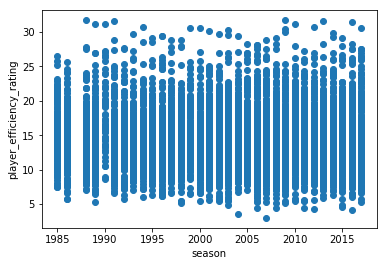

In [14]:
plt.scatter(exploratory['season'], exploratory['per'])
plt.xlabel('season')
plt.ylabel('player_efficiency_rating')

In [18]:
pd.read_sql_query('''SELECT name, season, per, CASE WHEN per > 30 THEN 'mind-blowing'
                                                    WHEN per > 25 THEN 'amazing'
                                                    WHEN per > 20 THEN 'solid'
                                                    WHEN per > 15 THEN 'above-average'
                                                    WHEN per > 10 THEN 'average'
                                                    WHEN per > 5 THEN 'sub-par'
                                                    WHEN per > 0 THEN 'garbage'
                                                    ELSE NULL END AS player_rating
                     FROM advancedplayerdata
                     LIMIT 100;''', cnx)

,name,season,per,player_rating
0,ATL_1985_Cliff Levingston,1985.0,14.6,average
1,ATL_1985_Doc Rivers,1985.0,18.1,above-average
2,ATL_1985_Dominique Wilkins,1985.0,20.9,solid
3,ATL_1985_Eddie Johnson,1985.0,15.8,above-average
4,ATL_1985_Randy Wittman,1985.0,11.2,average
5,ATL_1985_Rickey Brown,1985.0,7.5,sub-par
6,ATL_1985_Scott Hastings,1985.0,9.7,sub-par
7,ATL_1985_Sly Williams,1985.0,12.9,average
8,ATL_1985_Tree Rollins,1985.0,12.3,average
9,ATL_1986_Antoine Carr,1986.0,14.4,average


In [31]:
pd.read_sql_query('''SELECT name, season, MAX(per) AS per, CASE WHEN MAX(per) > 30 THEN 'mind-blowing'
                                                    WHEN MAX(per) > 25 THEN 'amazing'
                                                    WHEN MAX(per) > 20 THEN 'solid'
                                                    WHEN MAX(per) > 15 THEN 'above-average'
                                                    WHEN MAX(per) > 10 THEN 'average'
                                                    WHEN MAX(per) > 5 THEN 'sub-par'
                                                    WHEN MAX(per) > 0 THEN 'garbage'
                                                    ELSE NULL END AS player_rating
                     FROM advancedplayerdata
                     WHERE gp > 42 AND min_g > 10
                     GROUP BY name, season
                     ORDER BY season
                     LIMIT 100;''', cnx)

,name,season,per,player_rating
0,ATL_1985_Cliff Levingston,1985.0,14.6,average
1,ATL_1985_Doc Rivers,1985.0,18.1,above-average
2,ATL_1985_Dominique Wilkins,1985.0,20.9,solid
3,ATL_1985_Eddie Johnson,1985.0,15.8,above-average
4,ATL_1985_Rickey Brown,1985.0,7.5,sub-par
5,ATL_1985_Scott Hastings,1985.0,9.7,sub-par
6,ATL_1985_Tree Rollins,1985.0,12.3,average
7,BOS_1985_Cedric Maxwell,1985.0,14.2,average
8,BOS_1985_Danny Ainge,1985.0,14.2,average
9,BOS_1985_Dennis Johnson,1985.0,14.4,average


In [28]:
pd.read_sql_query('''SELECT
                            COUNT(CASE WHEN per > 30 THEN 1 ELSE NULL END) AS mindblowing,
                            COUNT(CASE WHEN per > 25 THEN 1 ELSE NULL END) AS amazing,
                            COUNT(CASE WHEN per > 20 THEN 1 ELSE NULL END) AS solid,
                            COUNT(CASE WHEN per > 15 THEN 1 ELSE NULL END) AS aboveaverage,
                            COUNT(CASE WHEN per > 10 THEN 1 ELSE NULL END) AS average,
                            COUNT(CASE WHEN per > 5 THEN 1 ELSE NULL END) AS subpar,
                            COUNT(CASE WHEN per > 0 THEN 1 ELSE NULL END) AS garbage
                     FROM advancedplayerdata;''', cnx)

,mindblowing,amazing,solid,aboveaverage,average,subpar,garbage
0,50,191,841,3688,8727,10852,11250
